# Regresión Lineal: Costo de un incidente de seguridad.

En este ejercicio se explican los fundamentos basicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con las Cyberseguridad.

## Enunciado del ejercicio

EL ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoría.

# 1.- Generación del DataSet.

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)
print("La longitud de DataSet es:", len(X))

La longitud de DataSet es: 100


# 2.- Visualización del DataSet

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

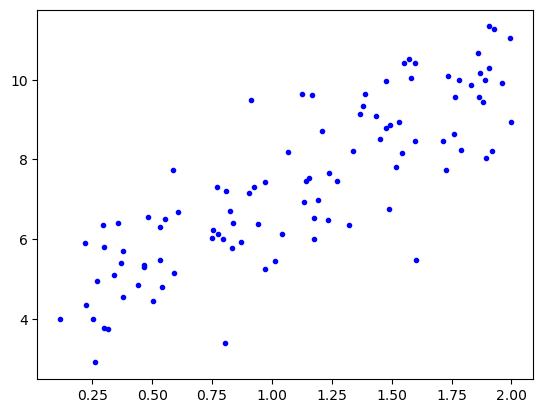

In [6]:
plt.plot(X, Y, "b.")
plt.show()

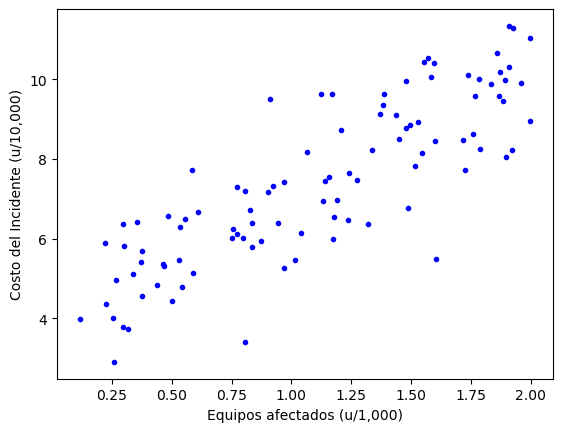

In [7]:
plt.plot(X, Y, 'b.')
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del Incidente (u/10,000)")
plt.show()

# 3.- Modificación del DataSet

In [9]:
import pandas as pd

In [10]:
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': Y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.371840,5.412749
1,0.294706,6.361606
2,1.571104,10.523982
3,1.387220,9.633549
4,0.225696,4.357783
5,1.239746,7.650960
6,0.254296,4.001472
7,1.881368,9.440956
8,0.911950,9.502045
9,0.339463,5.107475


In [23]:
# Escalado del Número de equipos afectados.
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
# Escalado del Costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,371,54127
1,294,63616
2,1571,105239
3,1387,96335
4,225,43577
5,1239,76509
6,254,40014
7,1881,94409
8,911,95020
9,339,51074


In [ ]:
plt.plot(df['No_Equipos_afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 4.-Construcción del modelo

In [43]:
from sklearn.linear_model import LinearRegression

In [45]:
# Construcción del modelo y ajuste de la función de hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [47]:
# Parámetro  Tetha 0
lin_reg.intercept_

39729.6690241689

In [51]:
# Parametro Tetha 1
lin_reg.coef_

array([30.796385])

In [55]:
# Predicción para el valor minimo y maximo para el conjunto de datos de entrenamiento
X_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

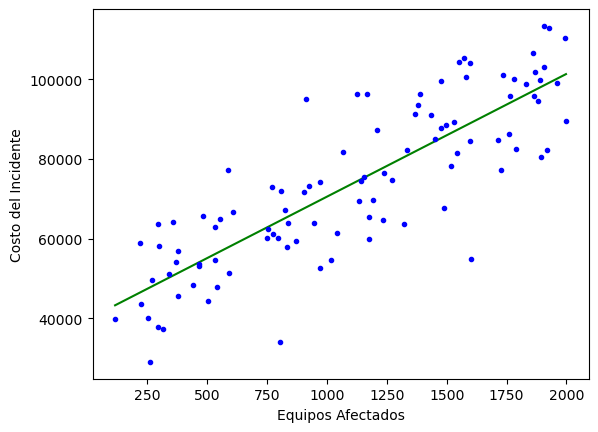

In [57]:
# Representación gráfica  de la función de hipótesis generada.
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 5.- Predicción de nuevos ejemplos

In [65]:
x_new = np.array([[2500]]) # Número de equipos afectados.
# Predicción del costo que tendría el incidente.
Costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $", int(Costo[0]))

El costo del incidente seria: $ 116720


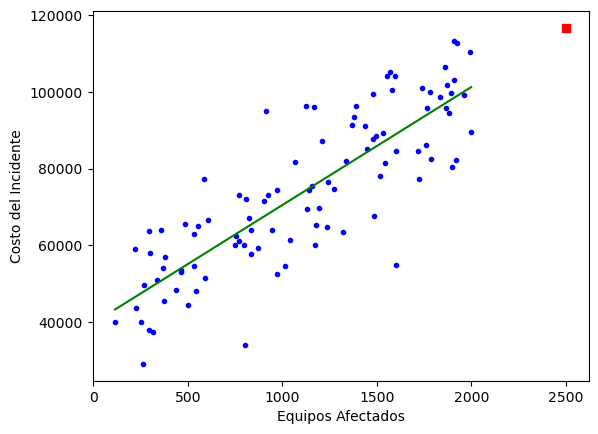

In [67]:
# Representación gráfica  de la función de hipótesis generada.
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rs")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()